# Projeto da III Unidade de PI Contagem de hemácias

### Alunos

- Gabriel Silva de Jesus
- Gustavo Henrique Aragão Silva

---

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

Leitura de uma imagem para descobrir detalhes iniciais:

In [71]:
nome_image = 'BloodImage_00339.jpg'

image_color = io.imread(nome_image)


### Passo 1 - Remover o os leucócitos

Com a sugestão do professor exploramos os canais HSV e olhamos mais especificamente para o canal H que define a cor. Assim conseguiremos remover os leucócitos. Para isso procuramos os valores maximos existentes de H numa dada imagem.


In [72]:
hsv = cv2.cvtColor(image_color, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(hsv)

# Encontrar o valor máximo de H
max_h, max_s, max_v = np.max(h), np.max(s), np.max(v)

print("Valor máximo de H S V respectivamente:", max_h, max_s, max_v)

Valor máximo de H S V respectivamente: 179 160 246


Após encontrar os valores máximos foi feita a variacao do canal h e encontramos o valor 160 


A função meu_adaptiveThreshold implementa um algoritmo de limiarização adaptativa em imagens em tons de cinza. Ela calcula limiares localmente com base na média ou no desvio padrão dos valores de intensidade em regiões específicas da imagem. Dependendo do método escolhido, o limiar é ajustado pela média ou pela média e desvio padrão. 

No nosso projeto testamos tanto a média quanto o desvio padrão e com base  nos testes selecionamos a opção da média pois foi ela que nos deu a melhor acurácia.

In [73]:
def meu_adaptiveThreshold(img, max_level, metodo, type_threshold, block_size, C):
    
    tamanho_borda = block_size // 2

    # Adiciona borda à imagem de entrada
    borda_img = np.pad(img, tamanho_borda, mode='constant')

    # Inicializa a imagem de saída
    img_saida = np.zeros_like(img)

    j, i = img.shape

    # Aplica o limiar adaptativo
    for y in range(tamanho_borda, j + tamanho_borda):
        for x in range(tamanho_borda, i + tamanho_borda):
            roi = borda_img[y - tamanho_borda:y + tamanho_borda + 1, x - tamanho_borda:x + tamanho_borda + 1]
            
            # Aplica o threshold da media
            if metodo == 0:
                threshold_value = np.mean(roi) - C
            # aplica o threshold gaussiano
            else:
                threshold_value = np.mean(roi) - C * np.std(roi) / block_size
            
            # aplica o threshold gaussiano
            if type_threshold == 0:
                img_saida[y - tamanho_borda, x - tamanho_borda] = max_level if img[y - tamanho_borda, x - tamanho_borda] > threshold_value else 0
            
            # aplica o threshold da  media
            else:
                img_saida[y - tamanho_borda, x - tamanho_borda] = 0 if img[y - tamanho_borda, x - tamanho_borda] > threshold_value else max_level

nome_image = 'BloodImage_00396.jpg'




Valor máximo de H: 179


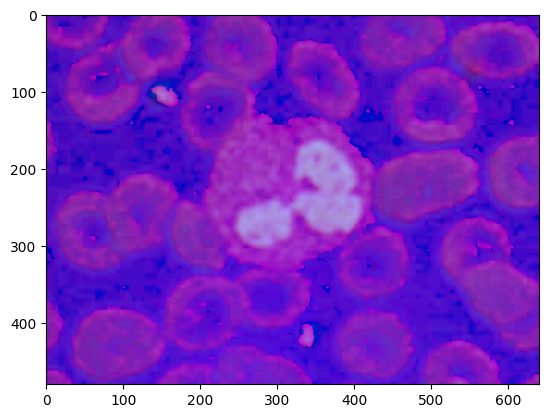

In [74]:
nome_image = 'BloodImage_00339.jpg'


image_color = io.imread(nome_image)

# Carregar a imagem

# Converter para o espaço de cores HSV
hsv = cv2.cvtColor(image_color, cv2.COLOR_BGR2HSV)

# Separar os canais H, S e V
h, s, v = cv2.split(hsv)

# Encontrar o valor máximo de H
max_h = np.max(h)

print("Valor máximo de H:", max_h)



# h = np.histogram (hsv.ravel(),bins=256)
# plt.plot (h[0],'-k')

plt.imshow(hsv.astype(np.uint8),cmap='gray')


